In [5]:
#%matplotlib nbagg
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
print("start!")
ims = []
dataall=[]
print(dataall)
dataall=np.zeros((4000, 2409))
N = 2409  # 1レコード番号あたりに格納されているデータの数。
M = 4000  # レコードの総数。
numb=1
for i in range(8):
    fol=format(i, '03b')
    for j in range(10):
        numb+=1
        mass="{0:02d}".format(j+1)
        fname='./glbdsk_str'+fol+"M"+mass+'.dat'
        f = open(fname, 'r')
        dty = np.dtype([('data', '<' + str(N) + 'f')])
        chunk = np.fromfile(f, dtype=dty, count=M)
        data = []
        for k in range(M):
            data.append(chunk[k]['data'])
        data=np.array(data)
        dataall=np.dstack((dataall, data))
print("end")
np.save('dataall_saverhoLd3', dataall)

start!
[]
end


In [6]:
#np.save('dataall_save', dataall)
#%matplotlib nbagg
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
import multiprocessing as mp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
#dataall=np.load('dataall_save.npy')
dataall=np.load('dataall_saverhoLd3.npy')


0 0.011729368240142412
298 0.010561984066002297 0.900473397182222


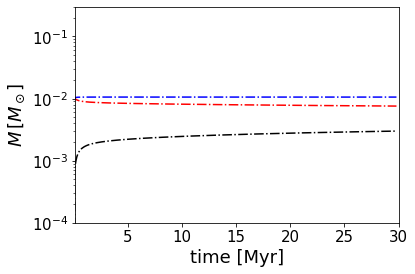

In [5]:
#non
%matplotlib inline
PE=[1.668e-10,4.965e-10,9.398e-10,1.478e-09,2.099e-09,2.797e-09,3.565e-09,4.399e-09,5.295e-09,6.25e-09]
cond=0
plt.xlim(1e-1, 3e1)
#plt.ylim(1e-11, 1e-7)
plt.ylim(1e-4, 3e-1)
#plt.ylim(0.01, 0.028)
plt.xlabel('time [Myr]', fontsize=18)
plt.ylabel(r'$M  \,[M_\odot]$', fontsize=18)
for ms in range(10):
    k=1+ms+(cond*10)
    pltdat=dataall[:,:,k]
    T=(np.array(range(299)))/10 #time 0.1Myr
    rcon=5
    trb=pltdat[rcon,604:903]
    wnd=-pltdat[rcon,905:1204]
    dmz=pltdat[rcon,2109:2408]
    x=pltdat[:,0]
    sgm=pltdat[:,1:300]
    Trb=np.array(range(299))/10.
    Pe=np.array(range(299))/10.
    Dw=np.array(range(299))/10.
    Tml=np.zeros(299)
    Tmd=np.zeros(299)
    Tmd1=np.zeros(299)
    Tmd2=np.zeros(299)
    Tall=np.zeros(299)
    
    for time in range(299):
        for r in range(3999):
            #print(x[r+1],x[r],sgm[r,time])
            Tmd[time]+=(x[r+1]**2-x[r]**2)*np.pi*sgm[r+1,time]*1.184e-07#何年？
            Tmd1[time]+=(x[r+1]**2-x[r]**2)*np.pi*sgm[r,time]*1.184e-07
            Tmd2[time]+=(x[r+1]**2-x[r]**2)*np.pi*(sgm[r+1,time]+sgm[r+1,time])*0.5*1.184e-07
        if time==0:
            Tall[time]=Tmd[time]
        else:
            Tall[time]=Tml[time-1]+Tmd[time]
        if time in [0] and ms==0:
            #print(time,Tmd[time],Tall[time])
            print(time,Tall[time])
            Tall0=Tall[time]
        if time in [298] and ms==0:
            #print(time,Tmd[time],Tall[time],Tall[time]/Tall0)
            print(time,Tall[time],Tall[time]/Tall0)
        Trb[time]=np.sum((-trb+wnd)[:time])*1e5
        #Pe[time]=(PE[ms]*time)*1e5
        #Dw[time]=np.sum(dmz[:time])*1e5
        Tml[time]=Trb[time]#+Pe[time]+Dw[time]
    
    wid=(1+ms)/5
    mss=(1+ms)/10
    taux=[3.7,0,3.2]
    if ms==0:
        #plt.plot(T,(-trb+wnd), linestyle = "dashed",color="k",label=r'$\.{M}_r$')
        #plt.plot(T,(dmz),color="k",label=r'$\.{M}_z$ DW')
        #plt.hlines(PE[ms],1e-1,2.97e1, linestyle = "dotted",color="k")
        #plt.plot(T,Trb, linestyle = "dashed",color="tab:pink",label=r'$\.{M}_r$')
        #plt.plot(T,Dw,color="tab:green",label=r'$\.{M}_z$ DW')
        #plt.plot(T,Pe,color="tab:orange", linestyle = "dotted")
        plt.plot(T,Tml,color="k", linestyle = "dashdot")
        plt.plot(T,Tmd,color="r", linestyle = "dashdot")
        #plt.plot(T,Tmd1,color="tab:pink", linestyle = "dashdot")
        #plt.plot(T,Tmd2,color="tab:green", linestyle = "dashdot")
        plt.plot(T,Tall,color="b", linestyle = "dashdot")
        ##plt.text(taux[0]*0.9,2.7e-9,r'$ \tau_{\mathrm{life}, 0.1M_\odot}$', fontsize=18)
        ##plt.annotate('', fontsize=18, xy=[taux[0],3e-10], xytext=[taux[0],2.3e-9],arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10,connectionstyle='arc3',facecolor='k',edgecolor='k'))
    #if ms==9:
        #plt.plot(T[:],(-trb+wnd)[:], linestyle = "dashed",color="#1f77b4",label=r'$\.{M}_r$')   
        #plt.plot(T[:],(dmz[:]),color="#1f77b4",label=r'$\.{M}_z$ DW')
        #plt.hlines(PE[ms],1e-1,6e0, linestyle = "dotted",color="#1f77b4")
        ##plt.text(taux[2]*0.9,1.3e-7,r'$ \tau_{\mathrm{life}, 1.0M_\odot}$', fontsize=18)
        ##plt.annotate('', fontsize=18, xy=[taux[2],1e-8], xytext=[taux[2],1e-7],arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10,connectionstyle='arc3',facecolor="#1f77b4",edgecolor="#1f77b4"))
#plt.xscale('log')
plt.yscale('log')
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=0.95)
plt.tick_params(labelsize=15)

plt.savefig("Mdotevo0jpg")

In [ ]:
0 0.027814715465324394 0.027814715465324394
298 0.007127893637342304 0.0244350409880237
298 0.007127893637342304 0.0244453271488357

In [4]:
0 0.027814715465324394 0.027814715465324394
298 0.007127893637342304 0.0244453271488357

0.0244453271488357/0.027814715465324394


0.8788631032127872

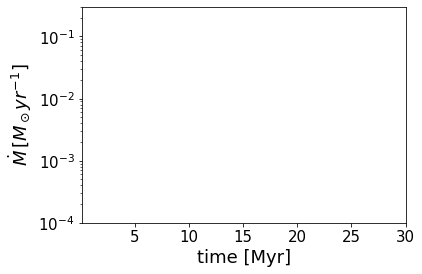

In [3]:

#PEDWi
%matplotlib inline
PE=[1.668e-10,4.965e-10,9.398e-10,1.478e-09,2.099e-09,2.797e-09,3.565e-09,4.399e-09,5.295e-09,6.25e-09]
cond=6
plt.xlim(1e-1, 3e1)
#plt.ylim(1e-11, 1e-7)
plt.ylim(1e-4, 3e-1)
plt.xlabel('time [Myr]', fontsize=18)
plt.ylabel(r'$\.{M}  \,[M_\odot yr^{-1}]$', fontsize=18)
for ms in range(10):
    k=1+ms+(cond*10)
    pltdat=dataall[:,:,k]
    T=(np.array(range(299)))/10 #time 0.1Myr
    rcon=5
    trb=pltdat[rcon,604:903]
    wnd=-pltdat[rcon,905:1204]
    dmz=pltdat[rcon,2109:2408]
    x=pltdat[:,0]
    sgm=pltdat[:,1:300]
    Trb=np.array(range(299))/10.
    Pe=np.array(range(299))/10.
    Dw=np.array(range(299))/10.
    Tml=np.array(range(299))/10.
    Tmd=np.zeros(299)
    Tmd1=np.zeros(299)
    Tmd2=np.zeros(299)
    Tall=np.zeros(299)
    
    for time in range(299):
        Trb[time]=np.sum((-trb+wnd)[:time])*1e5
        Pe[time]=(PE[ms]*time)*1e5
        Dw[time]=np.sum(dmz[:time])*1e5
        Tml[time]=Trb[time]+Pe[time]+Dw[time]
        for r in range(3999):
            #print(x[r+1],x[r],sgm[r,time])
            Tmd[time]+=(x[r+1]**2-x[r]**2)*np.pi*sgm[r+1,time]*1.184e-07
            Tmd1[time]+=(x[r+1]**2-x[r]**2)*np.pi*sgm[r,time]*1.184e-07
            Tmd2[time]+=(x[r+1]**2-x[r]**2)*np.pi*(sgm[r+1,time]+sgm[r+1,time])*0.5*1.184e-07
        Tall[time]=Tml[time]+Tmd[time]

    
    wid=(1+ms)/5
    mss=(1+ms)/10
    taux=[3.7,0,3.2]
    if ms==0:
        #plt.plot(T,(-trb+wnd), linestyle = "dashed",color="k",label=r'$\.{M}_r$')
        #plt.plot(T,(dmz),color="k",label=r'$\.{M}_z$ DW')
        #plt.hlines(PE[ms],1e-1,2.97e1, linestyle = "dotted",color="k")
        #plt.plot(T,Trb, linestyle = "dashed",color="tab:pink",label=r'$\.{M}_r$')
        #plt.plot(T,Dw,color="tab:green",label=r'$\.{M}_z$ DW')
        #plt.plot(T,Pe,color="tab:orange", linestyle = "dotted")
        plt.plot(T,Tml,color="k", linestyle = "dashdot")
        plt.plot(T,Tmd,color="r", linestyle = "dashdot")
        #plt.plot(T,Tmd1,color="tab:pink", linestyle = "dashdot")
        #plt.plot(T,Tmd2,color="tab:green", linestyle = "dashdot")
        plt.plot(T,Tall,color="b", linestyle = "dashdot")
        ##plt.text(taux[0]*0.9,2.7e-9,r'$ \tau_{\mathrm{life}, 0.1M_\odot}$', fontsize=18)
        ##plt.annotate('', fontsize=18, xy=[taux[0],3e-10], xytext=[taux[0],2.3e-9],arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10,connectionstyle='arc3',facecolor='k',edgecolor='k'))
    #if ms==9:
        #plt.plot(T[:],(-trb+wnd)[:], linestyle = "dashed",color="#1f77b4",label=r'$\.{M}_r$')   
        #plt.plot(T[:],(dmz[:]),color="#1f77b4",label=r'$\.{M}_z$ DW')
        #plt.hlines(PE[ms],1e-1,6e0, linestyle = "dotted",color="#1f77b4")
        ##plt.text(taux[2]*0.9,1.3e-7,r'$ \tau_{\mathrm{life}, 1.0M_\odot}$', fontsize=18)
        ##plt.annotate('', fontsize=18, xy=[taux[2],1e-8], xytext=[taux[2],1e-7],arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10,connectionstyle='arc3',facecolor="#1f77b4",edgecolor="#1f77b4"))
#plt.xscale('log')
plt.yscale('log')
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=0.95)
plt.tick_params(labelsize=15)

plt.savefig("Mdotevo6-1jpg")

0 0.011729368240142412
298 0.005457827076834863 0.465312961882813


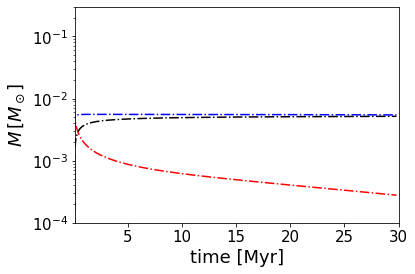

In [7]:
#non
%matplotlib inline
PE=[1.668e-10,4.965e-10,9.398e-10,1.478e-09,2.099e-09,2.797e-09,3.565e-09,4.399e-09,5.295e-09,6.25e-09]
cond=1
plt.xlim(1e-1, 3e1)
#plt.ylim(1e-11, 1e-7)
plt.ylim(1e-4, 3e-1)
#plt.ylim(0.01, 0.028)
plt.xlabel('time [Myr]', fontsize=18)
plt.ylabel(r'$M  \,[M_\odot]$', fontsize=18)
for ms in range(10):
    k=1+ms+(cond*10)
    pltdat=dataall[:,:,k]
    T=(np.array(range(299)))/10 #time 0.1Myr
    rcon=5
    trb=pltdat[rcon,604:903]
    wnd=-pltdat[rcon,905:1204]
    dmz=pltdat[rcon,2109:2408]
    x=pltdat[:,0]
    sgm=pltdat[:,1:300]
    Trb=np.array(range(299))/10.
    Pe=np.array(range(299))/10.
    Dw=np.array(range(299))/10.
    Tml=np.zeros(299)
    Tmd=np.zeros(299)
    Tmd1=np.zeros(299)
    Tmd2=np.zeros(299)
    Tall=np.zeros(299)
    
    for time in range(299):
        for r in range(3999):
            #print(x[r+1],x[r],sgm[r,time])
            Tmd[time]+=(x[r+1]**2-x[r]**2)*np.pi*sgm[r+1,time]*1.184e-07#何年？
            Tmd1[time]+=(x[r+1]**2-x[r]**2)*np.pi*sgm[r,time]*1.184e-07
            Tmd2[time]+=(x[r+1]**2-x[r]**2)*np.pi*(sgm[r+1,time]+sgm[r+1,time])*0.5*1.184e-07
        if time==0:
            Tall[time]=Tmd[time]
        else:
            Tall[time]=Tml[time-1]+Tmd[time]
        if time in [0] and ms==0:
            #print(time,Tmd[time],Tall[time])
            print(time,Tall[time])
            Tall0=Tall[time]
        if time in [298] and ms==0:
            #print(time,Tmd[time],Tall[time],Tall[time]/Tall0)
            print(time,Tall[time],Tall[time]/Tall0)
        Trb[time]=np.sum((-trb+wnd)[:time])*1e5
        #Pe[time]=(PE[ms]*time)*1e5
        #Dw[time]=np.sum(dmz[:time])*1e5
        Tml[time]=Trb[time]#+Pe[time]+Dw[time]
    
    wid=(1+ms)/5
    mss=(1+ms)/10
    taux=[3.7,0,3.2]
    if ms==0:
        #plt.plot(T,(-trb+wnd), linestyle = "dashed",color="k",label=r'$\.{M}_r$')
        #plt.plot(T,(dmz),color="k",label=r'$\.{M}_z$ DW')
        #plt.hlines(PE[ms],1e-1,2.97e1, linestyle = "dotted",color="k")
        #plt.plot(T,Trb, linestyle = "dashed",color="tab:pink",label=r'$\.{M}_r$')
        #plt.plot(T,Dw,color="tab:green",label=r'$\.{M}_z$ DW')
        #plt.plot(T,Pe,color="tab:orange", linestyle = "dotted")
        plt.plot(T,Tml,color="k", linestyle = "dashdot")
        plt.plot(T,Tmd,color="r", linestyle = "dashdot")
        #plt.plot(T,Tmd1,color="tab:pink", linestyle = "dashdot")
        #plt.plot(T,Tmd2,color="tab:green", linestyle = "dashdot")
        plt.plot(T,Tall,color="b", linestyle = "dashdot")
        ##plt.text(taux[0]*0.9,2.7e-9,r'$ \tau_{\mathrm{life}, 0.1M_\odot}$', fontsize=18)
        ##plt.annotate('', fontsize=18, xy=[taux[0],3e-10], xytext=[taux[0],2.3e-9],arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10,connectionstyle='arc3',facecolor='k',edgecolor='k'))
    #if ms==9:
        #plt.plot(T[:],(-trb+wnd)[:], linestyle = "dashed",color="#1f77b4",label=r'$\.{M}_r$')   
        #plt.plot(T[:],(dmz[:]),color="#1f77b4",label=r'$\.{M}_z$ DW')
        #plt.hlines(PE[ms],1e-1,6e0, linestyle = "dotted",color="#1f77b4")
        ##plt.text(taux[2]*0.9,1.3e-7,r'$ \tau_{\mathrm{life}, 1.0M_\odot}$', fontsize=18)
        ##plt.annotate('', fontsize=18, xy=[taux[2],1e-8], xytext=[taux[2],1e-7],arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10,connectionstyle='arc3',facecolor="#1f77b4",edgecolor="#1f77b4"))
#plt.xscale('log')
plt.yscale('log')
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=0.95)
plt.tick_params(labelsize=15)

plt.savefig("Mdotevo1jpg")

0 0.011729368240142412
298 0.00745769138418741 0.6358135605858396


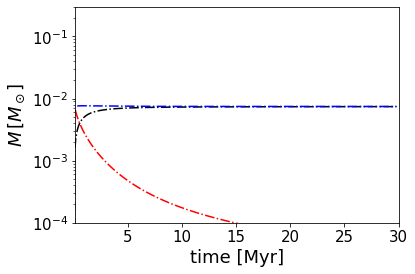

In [8]:
#non
%matplotlib inline
PE=[1.668e-10,4.965e-10,9.398e-10,1.478e-09,2.099e-09,2.797e-09,3.565e-09,4.399e-09,5.295e-09,6.25e-09]
cond=4
plt.xlim(1e-1, 3e1)
#plt.ylim(1e-11, 1e-7)
plt.ylim(1e-4, 3e-1)
#plt.ylim(0.01, 0.028)
plt.xlabel('time [Myr]', fontsize=18)
plt.ylabel(r'$M  \,[M_\odot]$', fontsize=18)
for ms in range(10):
    k=1+ms+(cond*10)
    pltdat=dataall[:,:,k]
    T=(np.array(range(299)))/10 #time 0.1Myr
    rcon=5
    trb=pltdat[rcon,604:903]
    wnd=-pltdat[rcon,905:1204]
    dmz=pltdat[rcon,2109:2408]
    x=pltdat[:,0]
    sgm=pltdat[:,1:300]
    Trb=np.array(range(299))/10.
    Pe=np.array(range(299))/10.
    Dw=np.array(range(299))/10.
    Tml=np.zeros(299)
    Tmd=np.zeros(299)
    Tmd1=np.zeros(299)
    Tmd2=np.zeros(299)
    Tall=np.zeros(299)
    
    for time in range(299):
        for r in range(3999):
            #print(x[r+1],x[r],sgm[r,time])
            Tmd[time]+=(x[r+1]**2-x[r]**2)*np.pi*sgm[r+1,time]*1.184e-07#何年？
            Tmd1[time]+=(x[r+1]**2-x[r]**2)*np.pi*sgm[r,time]*1.184e-07
            Tmd2[time]+=(x[r+1]**2-x[r]**2)*np.pi*(sgm[r+1,time]+sgm[r+1,time])*0.5*1.184e-07
        if time==0:
            Tall[time]=Tmd[time]
        else:
            Tall[time]=Tml[time-1]+Tmd[time]
        if time in [0] and ms==0:
            #print(time,Tmd[time],Tall[time])
            print(time,Tall[time])
            Tall0=Tall[time]
        if time in [298] and ms==0:
            #print(time,Tmd[time],Tall[time],Tall[time]/Tall0)
            print(time,Tall[time],Tall[time]/Tall0)
        Trb[time]=np.sum((-trb+wnd)[:time])*1e5
        #Pe[time]=(PE[ms]*time)*1e5
        Dw[time]=np.sum(dmz[:time])*1e5
        Tml[time]=Trb[time]+Dw[time]#+Pe[time]
    
    wid=(1+ms)/5
    mss=(1+ms)/10
    taux=[3.7,0,3.2]
    if ms==0:
        #plt.plot(T,(-trb+wnd), linestyle = "dashed",color="k",label=r'$\.{M}_r$')
        #plt.plot(T,(dmz),color="k",label=r'$\.{M}_z$ DW')
        #plt.hlines(PE[ms],1e-1,2.97e1, linestyle = "dotted",color="k")
        #plt.plot(T,Trb, linestyle = "dashed",color="tab:pink",label=r'$\.{M}_r$')
        #plt.plot(T,Dw,color="tab:green",label=r'$\.{M}_z$ DW')
        #plt.plot(T,Pe,color="tab:orange", linestyle = "dotted")
        plt.plot(T,Tml,color="k", linestyle = "dashdot")
        plt.plot(T,Tmd,color="r", linestyle = "dashdot")
        #plt.plot(T,Tmd1,color="tab:pink", linestyle = "dashdot")
        #plt.plot(T,Tmd2,color="tab:green", linestyle = "dashdot")
        plt.plot(T,Tall,color="b", linestyle = "dashdot")
        ##plt.text(taux[0]*0.9,2.7e-9,r'$ \tau_{\mathrm{life}, 0.1M_\odot}$', fontsize=18)
        ##plt.annotate('', fontsize=18, xy=[taux[0],3e-10], xytext=[taux[0],2.3e-9],arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10,connectionstyle='arc3',facecolor='k',edgecolor='k'))
    #if ms==9:
        #plt.plot(T[:],(-trb+wnd)[:], linestyle = "dashed",color="#1f77b4",label=r'$\.{M}_r$')   
        #plt.plot(T[:],(dmz[:]),color="#1f77b4",label=r'$\.{M}_z$ DW')
        #plt.hlines(PE[ms],1e-1,6e0, linestyle = "dotted",color="#1f77b4")
        ##plt.text(taux[2]*0.9,1.3e-7,r'$ \tau_{\mathrm{life}, 1.0M_\odot}$', fontsize=18)
        ##plt.annotate('', fontsize=18, xy=[taux[2],1e-8], xytext=[taux[2],1e-7],arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10,connectionstyle='arc3',facecolor="#1f77b4",edgecolor="#1f77b4"))
#plt.xscale('log')
plt.yscale('log')
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=0.95)
plt.tick_params(labelsize=15)

plt.savefig("Mdotevo4jpg")